In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('./data/penguins_lter.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

Dátová sada obsahuje 344 riadkov a 17 stĺpcov.
## Doplnenie chýbajúcich hodnôt
Zistime počet chýbajúcich hodnôt.

In [4]:
# pocet
df.isna().sum()

# percentaz chybajucich hodnot
# df.isnull().sum() * 100 / df.shape[0]

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Z vypísania dátovej sady sme zistili, že dve vzorky tučniakov (3, 339) neobsahujú väčšinu parametrov. Jedna z ponzámok napovedá, že dospelý jedinec nebol  odmeraný, tak tieto chybné vzorky odstránime. Doplňme ostatné chýbajúce číselné hodnoty vzoriek z krvi (Delta 15, Delta 13) ich strednou hodnotou. Percentuálne tieto chýbajúce hodnoty zaberajú ~3.5 % miesta v dátovej sade. Ďalej už len ostáva doplniť chýbajúce pohlavia tučniakov (~2 %) najčastejšou vyskytovanou hodnotou v sade. Taktiež vzorka tučniaka na riadku s indexom 336 obsahuje chybnú hodnotu (`.`) pohlavia. Nahradíme ju modusom tiež.

In [5]:
# odstranenie chybajucich vzoriek
bad_samples = [3, 339]
for x in bad_samples: df.drop(x, axis=0, inplace=True, errors = 'ignore')

# doplnenie vzoriek z krvi ich strednou hodnotou
missing_values = ['Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
for x in missing_values : df[x].fillna(value = df[x].mean(), inplace=True)

# doplnenie pohlavia modusom
df['Sex'].fillna(df['Sex'].mode().values[0], inplace=True)
df.loc[336,'Sex'] = 'MALE'
df.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      0
Delta 15 N (o/oo)        0
Delta 13 C (o/oo)        0
Comments               317
dtype: int64

## Odstránenie nepotrebných hodnôt
Z dátovej sady môžeme zmazať identifikačné hodnoty, ktorých kombinácia len identifikuje konkrétneho tučniaka - Individual ID, Sample Number.
Komentáre k odberu vzoriek sú taktiež nepotrebné na ďalšiu analýzu.

In [6]:
df.drop(['Individual ID', "Sample Number", "Comments"], axis = 1, inplace=True, errors = 'ignore')

## Rozložení hodnot

In [7]:
df.head()

,studyName,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,8.733382,-25.686292
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.949560,-24.694540
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.368210,-25.333020
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.766510,-25.324260
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.664960,-25.298050


In [8]:
df = df.replace({"Adelie Penguin (Pygoscelis adeliae)"	: "Adelie", "Gentoo penguin (Pygoscelis papua)": "Gentoo", "Chinstrap penguin (Pygoscelis antarctica)" : "Chinstrap"})

<AxesSubplot: xlabel='Species', ylabel='Flipper Length (mm)'>

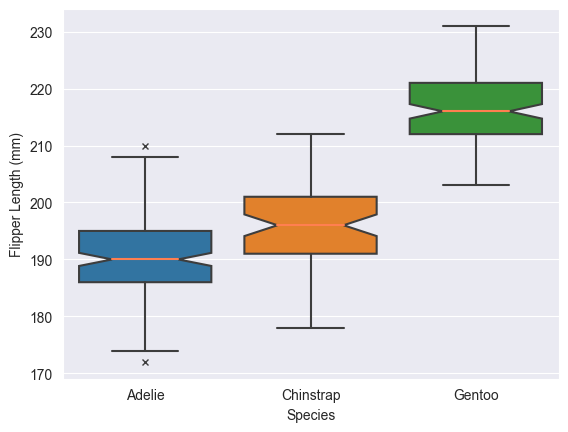

In [9]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15, 20), sharex=True)

# sns.barplot(y=df1, x=df2, ax=ax1, color="red")
sns.boxplot(
    data=df, x="Species", y="Flipper Length (mm)",
    notch=True, showcaps=True,
    flierprops={"marker": "x"},
    medianprops={"color": "coral"},
)
# sns.boxplot(data=df3, width=0.5,fliersize=5)

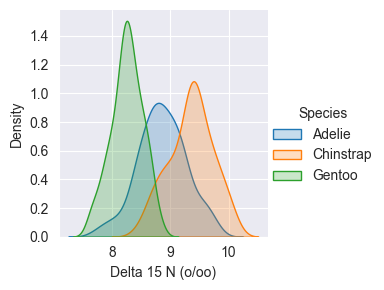

In [30]:
sns.FacetGrid(df, hue="Species") \
   .map(sns.kdeplot, "Delta 15 N (o/oo)", fill=True) \
   .add_legend()

<AxesSubplot: xlabel='Species', ylabel='Body Mass (g)'>

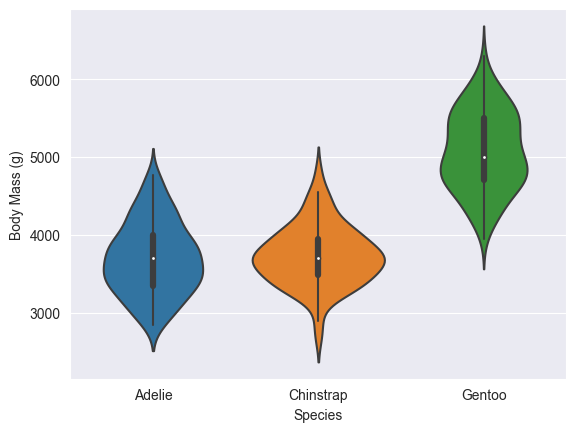

In [11]:
sns.violinplot(
    data=df, x="Species", y="Body Mass (g)",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

# sns.FacetGrid(df, hue="Species") \
#    .map(sns.violinplot, "Body Mass (g)", fill=True) \
#    .add_legend()

In [12]:
df1 = df[['Flipper Length (mm)']]
df2 = df[['Body Mass (g)']]
df3 = df[['Culmen Length (mm)']]
df4 = df[['Culmen Depth (mm)']]


df1.head()

,Flipper Length (mm)
0,181.0
1,186.0
2,195.0
4,193.0
5,190.0


<AxesSubplot: xlabel='Species', ylabel='Body Mass (g)'>

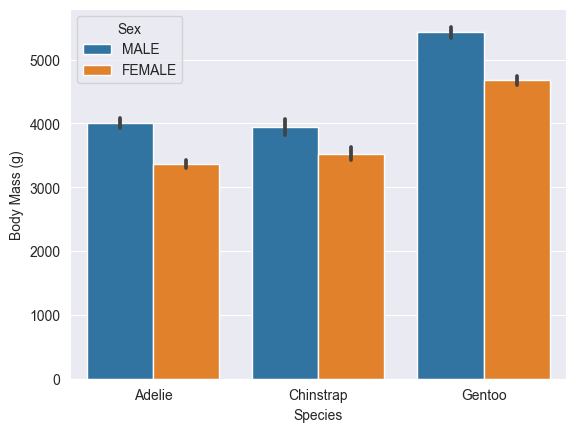

In [34]:
sns.barplot(data=df, x="Species", y="Body Mass (g)", hue="Sex")

## Korelácia

<Figure size 700x700 with 0 Axes>

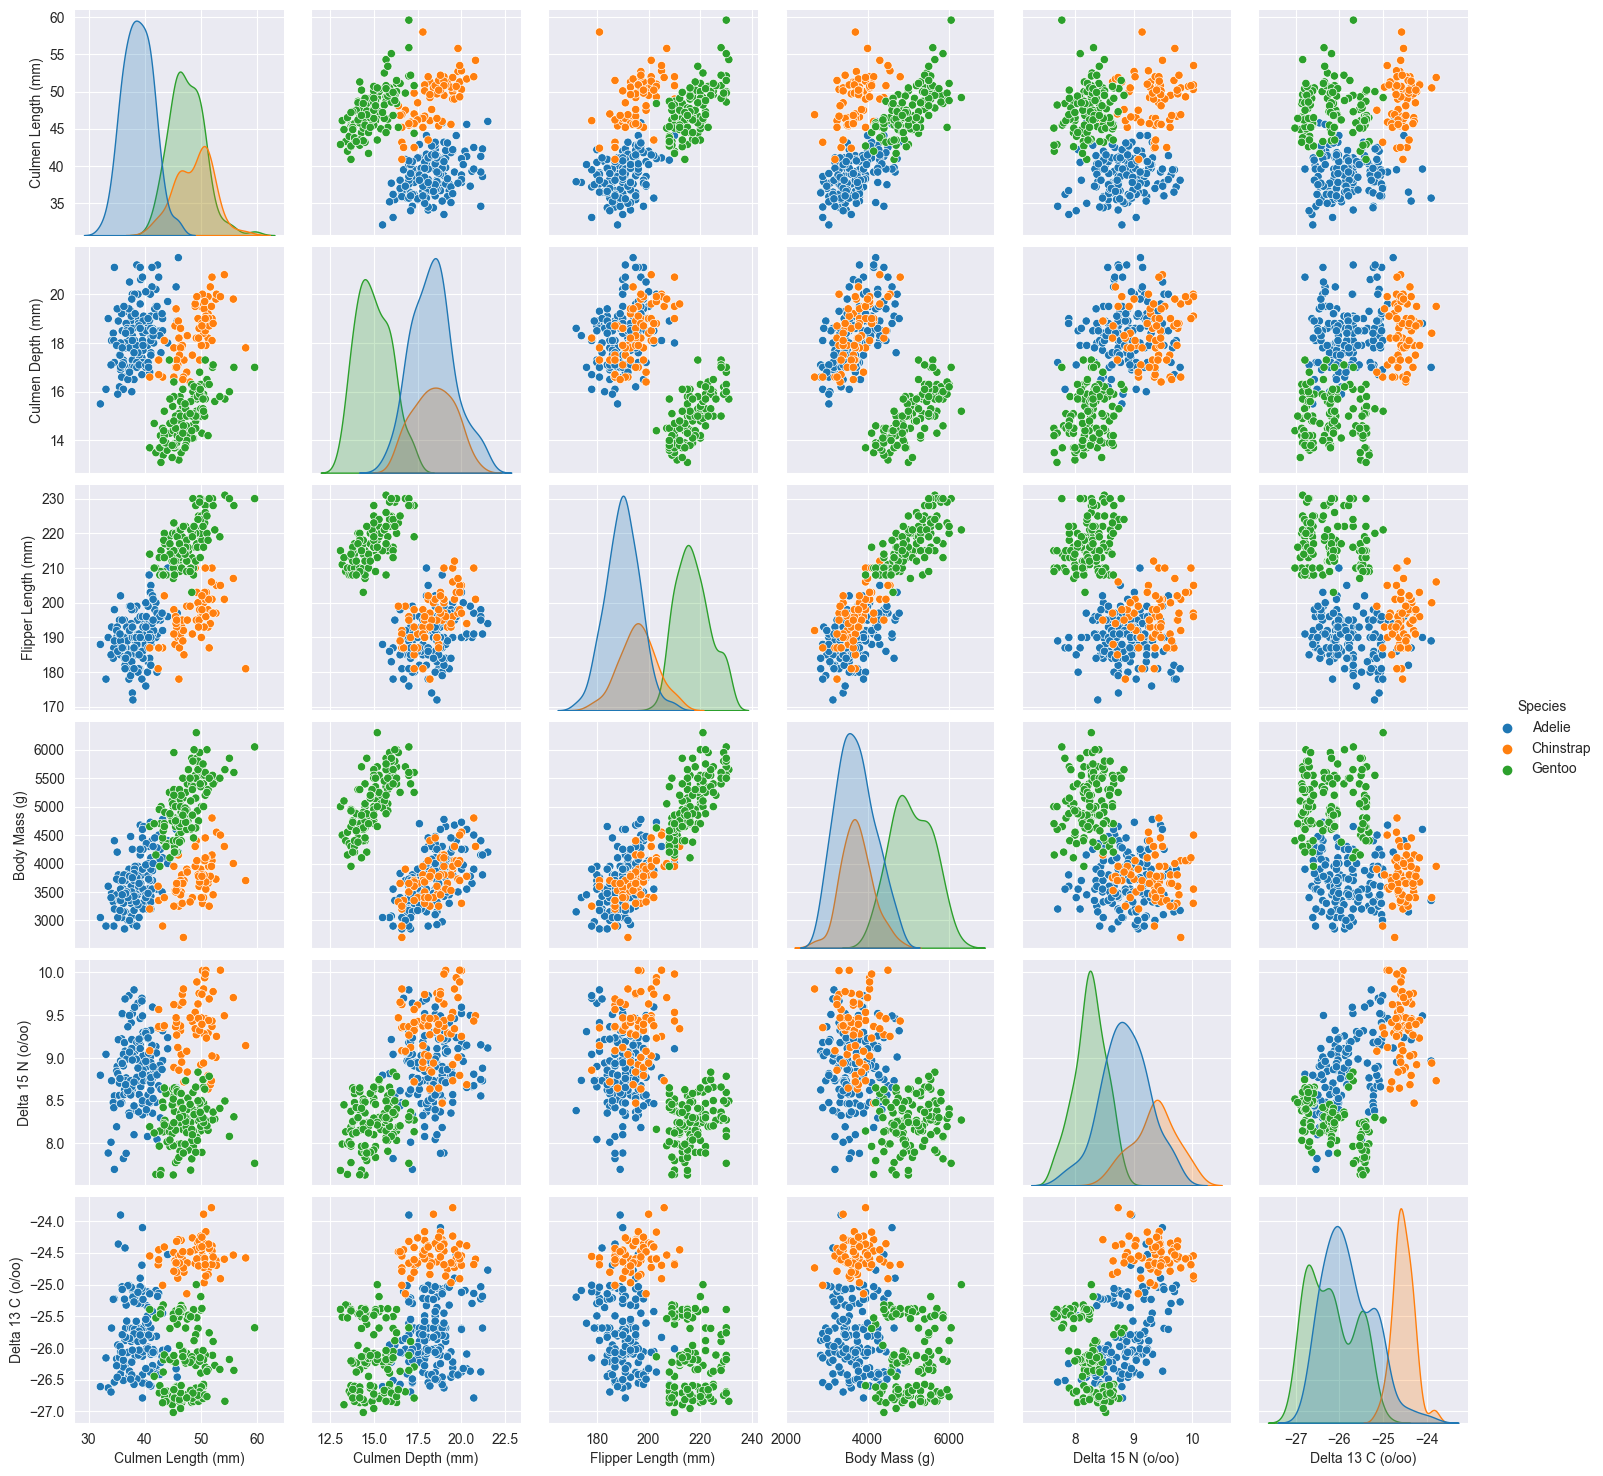

In [15]:
plt.figure(figsize=(7,7))
#sns.set_style('whitegrid')
sns.pairplot(data=df, hue='Species')#, palette=('DarkOrange', 'MediumOrchid', 'Teal'))

Z grafu na prvý pohľad sa dá vyčítať, že je vysoká korelácia medzi dĺžkou plutvy a váhou tučniaka. Poďme toto tvrdenie overiť aj na korelačnej matici.

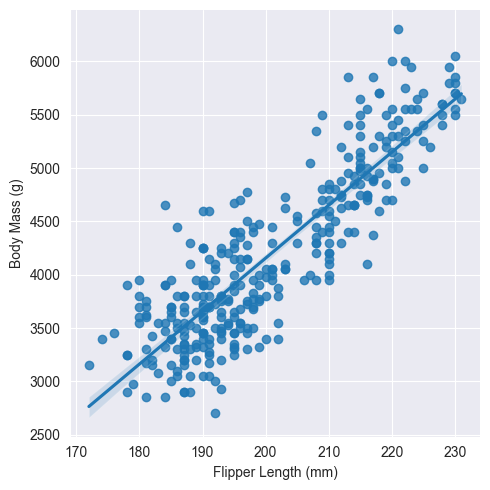

In [16]:
sns.lmplot(data=df, x="Flipper Length (mm)", y="Body Mass (g)", )

<AxesSubplot: >

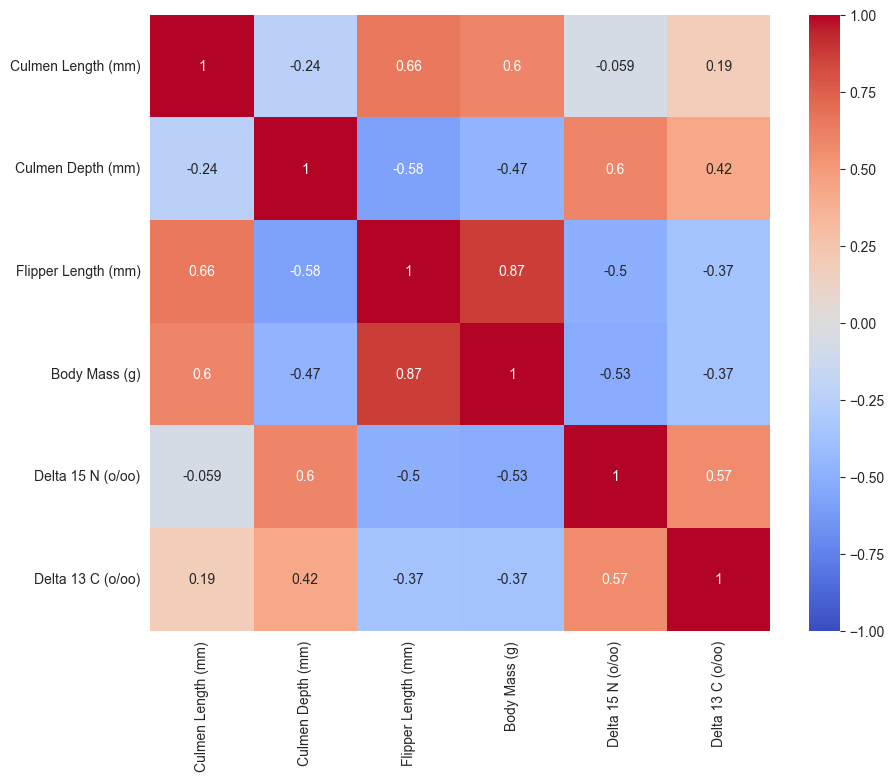

In [17]:
correlations = df.corr(method="pearson", numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, vmin= -1, cmap="coolwarm", annot=True)

Korelačná matica povtvrdila, že je medzi týmito parametrami celkom veľká korelácia (0,87).